In [48]:
import pickle
import sys

sys.path.append('..')
from src.sympy_utilities import *
from src.BinaryEncodings import *
from src.qiskit_utilities import *
from src.MatrixToPauliString import *

import matplotlib.pyplot as plt

def plot_data(eigs,offset=0):
    x=[[j+4+n*offset for n in range(len(eigs[j]))] for j in range(len(eigs))]
    y=[[d for d in eig] for eig in eigs]
    return (x,y)

def plot_data_by_level(eigs,offset=0):
    numLevels = len(eigs[len(eigs)-1])
    
    x=[[n+4+j*offset for n in range(len(eigs))] for j in range(numLevels)]
    y=[[eigs[n][i] if i<len(eigs[n]) else -1 for n in range(len(eigs))] for i in range(numLevels)]
    return (x,y)

In [37]:
HOhamEigsLoad[0]

array([0., 1., 1., 2., 2., 3., 3., 4.])

In [38]:
HOhamEigsLoad[4]

array([0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 7., 7., 8.])

In [39]:
len(HOhamEigsLoad[len(HOhamEigsLoad)-1])

128

In [40]:
xtst,ytst=plot_data_by_level(HOhamEigsLoad)

In [43]:
len(xtst[0])

72

In [44]:
len(ytst[0])

72

In [2]:
import pickle

In [3]:
h_b_HO = 0.5*(p*p + m*m*q*q)
h_f_HO = -0.5*m#[bdag,b]
    
HOcuts = [n for n in range(2**2,2**5+1)]
HOhamEigs = []
#HOqubitEigs = []

#REMEMBER QUBIT EIGS HAVE EXTRA ZERO EIGENVALUES

#for n in HOcuts:
#    hamHO = Hamiltonian(h_b_HO, h_f_HO, {m:1, g:1},
#                  n, standard_encode)

    #eigSys = np.linalg.eig(getMatrix(hamHO.pauliStrings))
    #eigVals = [en.real for en in eigSys[0]]
    #HOqubitEigs.append(np.sort(eigVals))
#    eigSys = np.linalg.eig(np.array(hamHO.hamMatrix,dtype=float))
#    eigVals = [en.real for en in eigSys[0]]
#    HOhamEigs.append(np.sort(eigVals))
    
#    pickle.dump(HOhamEigs,open("DATA/ho_eigs_vs_cutoff.p","wb"))

In [4]:
HOcuts = [n for n in range(2**5,2**6+1)]
#for n in HOcuts:
#    hamHO = Hamiltonian(h_b_HO, h_f_HO, {m:1, g:1},
#                  n, standard_encode)

#    eigSys = np.linalg.eig(np.array(hamHO.hamMatrix,dtype=float))
#    eigVals = [en.real for en in eigSys[0]]
#    HOhamEigs.append(np.sort(eigVals))
    
#    pickle.dump(HOhamEigs,open("DATA/ho_eigs_vs_cutoff.p","wb"))

In [5]:
HOhamEigsLoad=pickle.load(open("DATA/ho_eigs_vs_cutoff.p","rb"))

In [9]:
HOhamEigsLoad[0]

array([0., 1., 1., 2., 2., 3., 3., 4.])

In [14]:
HOhamEigsLoad[4]

array([0., 1., 1., 2., 2., 3., 3., 4., 4., 5., 5., 6., 6., 7., 7., 8.])

In [6]:
import matplotlib 
#matplotlib.use("Agg")
plt.style.use("paper.mplstyle")

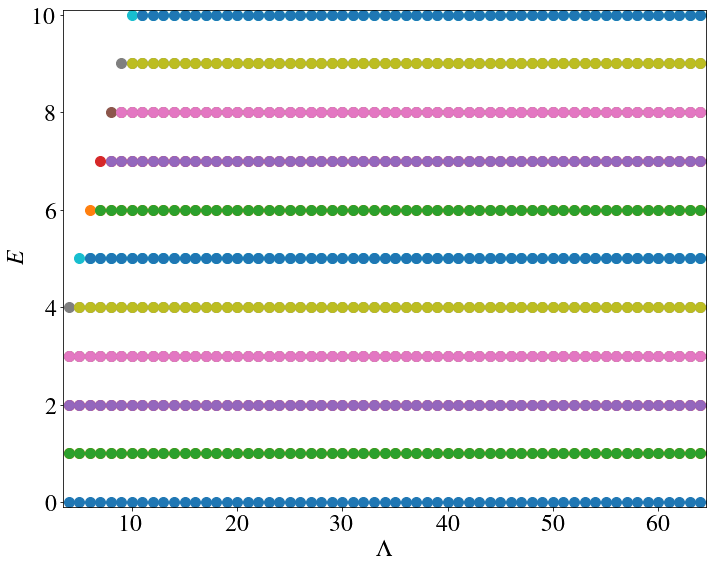

In [51]:
x, y = plot_data_by_level(HOhamEigsLoad)

for i in range(len(x)):
    plt.scatter(x[i],y[i])


plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')

plt.xlim(3.5,64.5)
plt.ylim(-0.1,10.1)
plt.savefig('PLOTS/HO_spectra.pdf',bbox_inches='tight')

In [10]:
#eigs[0]

In [12]:
#x,y=plot_data(AHOeigsg0)

#for i in range(len(AHOeigsg0)):
#    plt.scatter(x[i],y[i])
#plt.plot([x-2 for x in range(2**5)],[0 for y in range(2**5)])
#plt.xlabel('$\\Lambda$')
#plt.ylabel('$E$')
#plt.xlim(3,17)
#plt.ylim(-5,10)
#plt.title('AHO with $g=0$')
#plt.show()
#plt.savefig('PLOTS/.pdf')

In [2]:
AHOcuts = [n for n in range(2**2,2**5+1)]
#AHOqubitEigs = []
AHOhamEigs = []

h_b_AHO = 0.5*(p*p) + 0.5*(m*q+g*q**3)**2
h_f_AHO = -0.5*(m+3*g*q*q)#[bdag,b]

for n in AHOcuts:
    ham = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:1},
                  n, standard_encode)

    #eigSys = np.linalg.eig(getMatrix(ham.pauliStrings))
    #eigVals = [en.real for en in eigSys[0]]
    #AHOqubitEigs.append(np.sort(eigVals))
    eigSys = np.linalg.eig(np.array(ham.hamMatrix,dtype=float))
    eigVals = [en.real for en in eigSys[0]]
    AHOhamEigs.append(np.sort(eigVals))
    
    pickle.dump(AHOhamEigs,open("DATA/aho_eigs_vs_cutoff.p","wb"))

In [ ]:
AHOcuts = [n for n in range(2**5,2**6+1)]

for n in AHOcuts:
    ham = Hamiltonian(h_b_AHO, h_f_AHO, {m:1, g:1},
                  n, standard_encode)

    eigSys = np.linalg.eig(np.array(ham.hamMatrix,dtype=float))
    eigVals = [en.real for en in eigSys[0]]
    AHOhamEigs.append(np.sort(eigVals))
    
    pickle.dump(AHOhamEigs,open("DATA/aho_eigs_vs_cutoff.p","wb"))

In [52]:
AHOhamEigsLoad=pickle.load(open("DATA/aho_eigs_vs_cutoff.p","rb"))

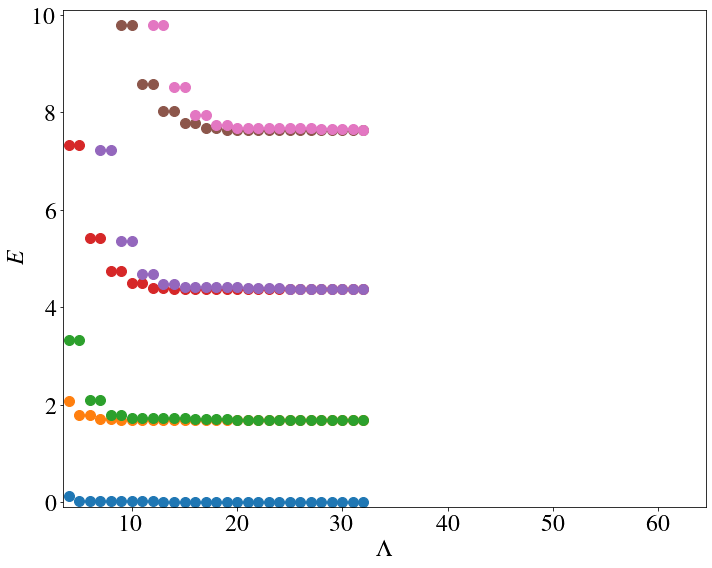

In [64]:
x, y = plot_data_by_level(AHOhamEigsLoad)

for i in range(len(x)):
    plt.scatter(x[i],y[i])


plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')

plt.xlim(3.5,64.5)
plt.ylim(-0.1,10.1)

plt.savefig('PLOTS/AHO_spectra.pdf',bbox_inches='tight')

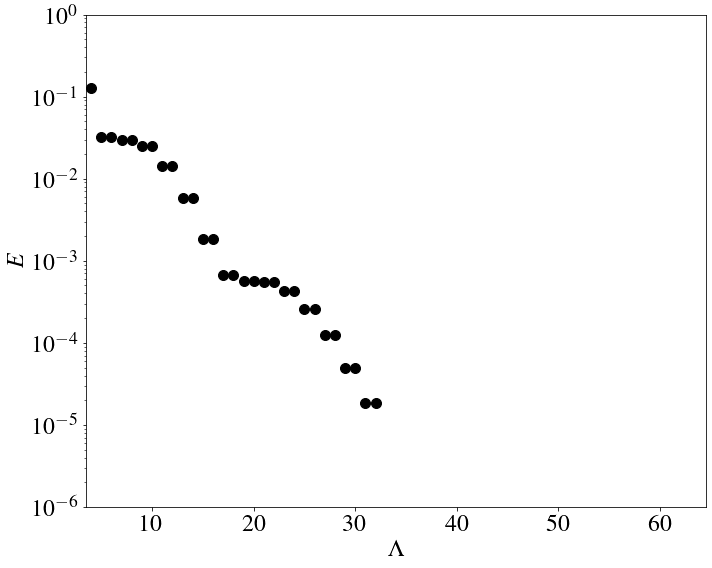

In [63]:
x, y = plot_data_by_level(AHOhamEigsLoad)

for i in range(len(x)):
    plt.scatter(x[i],y[i], c='black')


plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')

plt.xlim(3.5,64.5)
plt.ylim(1e-6,1e0)
plt.yscale('log')
plt.savefig('PLOTS/AHO_spectra_zoom.pdf',bbox_inches='tight')

In [ ]:
#x,y=plot_data(AHOhamEigs)
#fig, ax1 = plt.subplots()#

# These are in unitless percentages of the figure size. (0,0 is bottom left)
#left, bottom, width, height = [0.2, 0.65, 0.2, 0.2]
#ax2 = fig.add_axes([left, bottom, width, height])

#for ax in [ax1,ax2]:
#    for i in range(len(AHOhamEigs)):
#        ax.scatter(x[i],y[i])

#ax2.set_ylim([1e-10,1e-1])
#ax2.set_xlabel('$\\Lambda$',fontsize=12)
#ax2.set_ylabel('$E$',fontsize=12)
#ax2.set_yscale('log')

#ax1.set_ylim([0,50])
#ax1.set_xlabel('$\\Lambda$')
#ax1.set_ylabel('$E$')

#fig.savefig('PLOTS/AHO_spectra.pdf',bbox_inches='tight')

# Double well spectrum

In [3]:
h_b_DW = 0.5*(p*p + (m*q + g*(q*q + mu*mu))**2)
h_f_DW = -0.5*(m+2*g*q)#[bdag,b]

DWcuts = [n for n in range(2**2,2**5+1)]
#DWqubitEigs = []
DWhamEigs = []

for n in DWcuts:
    ham = Hamiltonian(h_b_DW, h_f_DW, {m:1, g:1, mu:1},
                  n, standard_encode)

    #eigSys = np.linalg.eig(getMatrix(ham.pauliStrings))
    #eigVals = [en.real for en in eigSys[0]]
    #DWqubitEigs.append(np.sort(eigVals))
    eigSys = np.linalg.eig(np.array(ham.hamMatrix,dtype=float))
    eigVals = [en.real for en in eigSys[0]]
    DWhamEigs.append(np.sort(eigVals))
    
    pickle.dump(DWhamEigs,open("DATA/dw_eigs_vs_cutoff.p","wb"))

In [15]:
DWcuts = [n for n in range(2**5,2**6+1)]


for n in DWcuts:
    ham = Hamiltonian(h_b_DW, h_f_DW, {m:1, g:1, mu:1},
                  n, standard_encode)

    eigSys = np.linalg.eig(np.array(ham.hamMatrix,dtype=float))
    eigVals = [en.real for en in eigSys[0]]
    DWhamEigs.append(np.sort(eigVals))
    
    pickle.dump(DWhamEigs,open("DATA/dw_eigs_vs_cutoff.p","wb"))

In [56]:
DWhamEigsLoad=pickle.load(open("DATA/dw_eigs_vs_cutoff.p","rb"))

In [52]:
#x,y=plot_data(DWhamEigs)
#fig, ax1 = plt.subplots()

# These are in unitless percentages of the figure size. (0,0 is bottom left)
#left, bottom, width, height = [0.2, 0.65, 0.2, 0.2]
#ax2 = fig.add_axes([left, bottom, width, height])

#for ax in [ax1,ax2]:
#    for i in range(len(DWhamEigs)):
#        ax.scatter(x[i],y[i])

#ax2.set_ylim([1e-1,1.1])
#ax2.set_xlabel('$\\Lambda$',fontsize=12)
#ax2.set_ylabel('$E$',fontsize=12)


#ax1.set_xlabel('$\\Lambda$')
#ax1.set_ylabel('$E$')

#fig.savefig('PLOTS/DW_spectra.pdf',bbox_inches='tight')

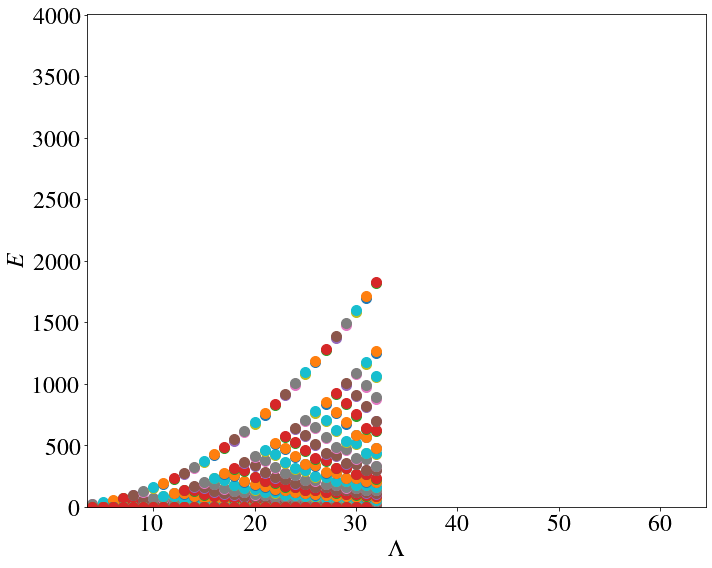

In [68]:
x, y = plot_data_by_level(DWhamEigsLoad)

for i in range(len(x)):
    plt.scatter(x[i],y[i])


plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')

plt.xlim(3.5,64.5)
plt.ylim(-0.1,4000.1)
plt.show()
#plt.savefig('PLOTS/DW_spectra.pdf',bbox_inches='tight')

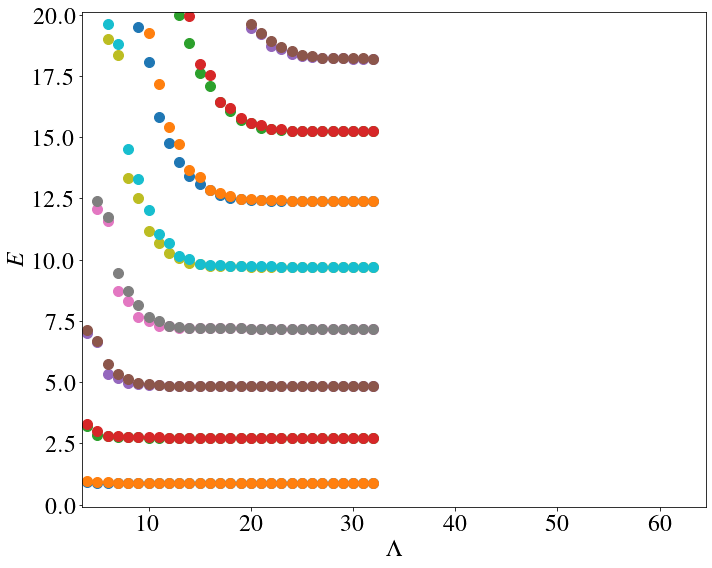

In [65]:
x, y = plot_data_by_level(DWhamEigsLoad)

for i in range(len(x)):
    plt.scatter(x[i],y[i])


plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')

plt.xlim(3.5,64.5)
plt.ylim(-0.1,20.1)

plt.savefig('PLOTS/DW_spectra.pdf',bbox_inches='tight')

# ground state is near or not to zero, and can see convergence of some excited states

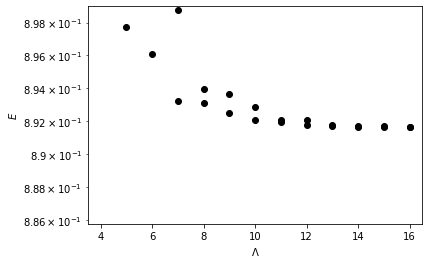

In [14]:
x, y = plot_data(DWhamEigs)

for i in range(len(x)):
    plt.scatter(x[i],y[i], c='black')


plt.xlabel('$\\Lambda$')
plt.ylabel('$E$')

plt.xlim(3.5,16.5)
plt.ylim(0.8858,0.899)
plt.yscale('log')

plt.savefig('PLOTS/DW_spectra_zoom.pdf',bbox_inches='tight')

In [74]:
#x, y = plot_data(DWhamEigs)#

#for i in range(len(x)):
#    plt.scatter(x[i],np.array(y[i])-np.array([0.891 for i in range(len(y[i]))]), c='black')


#plt.xlabel('$\\Lambda$')
#plt.ylabel('$\\Delta E$')

#plt.xlim(3.5,16.5)
#plt.ylim(1e-6,1e-1)
#plt.yscale('log')

#plt.savefig('PLOTS/DW_spectra.pdf',bbox_inches='tight')